In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [2]:
X =np.loadtxt('mouse.csv', delimiter=",") # read data as numpy
statistic = pd.DataFrame(X) # for showing statistic data
print(statistic.head(10))
# statistic.hist()
# statistic.describe()

          0         1
0  0.542269  0.434343
1  0.421568  0.508084
2  0.432454  0.561386
3  0.565750  0.569858
4  0.488102  0.479678
5  0.439754  0.558877
6  0.533067  0.545960
7  0.401049  0.356470
8  0.512509  0.574135
9  0.380291  0.535251


In [107]:
import random

# parameter - labels : label obtained after clustering
# Output - color list Generated by the number of labels
def color(labels) :
    unique_labels = set(labels) # get unique label 
    # slice color by considerig the number of unique labels
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] 
    colors.append([0,0,0,1]) # add black color for noise
    return colors

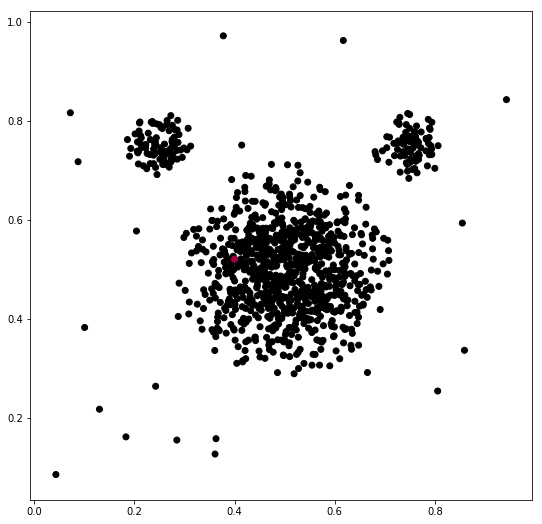

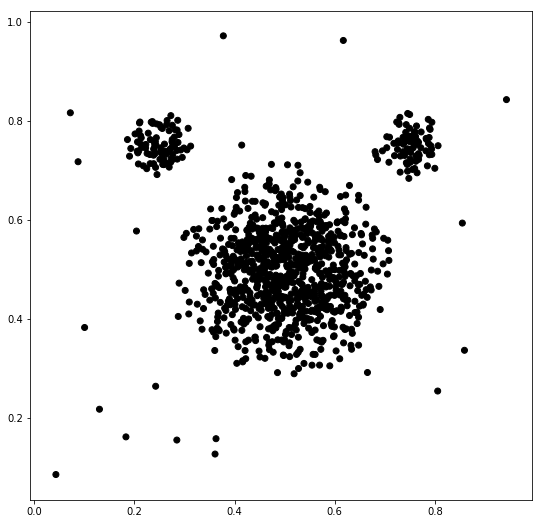

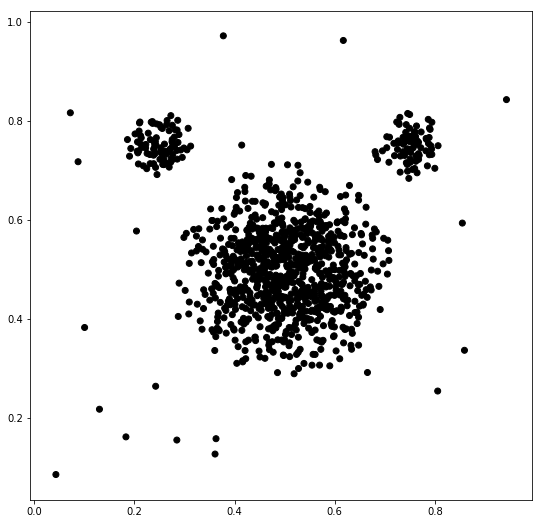

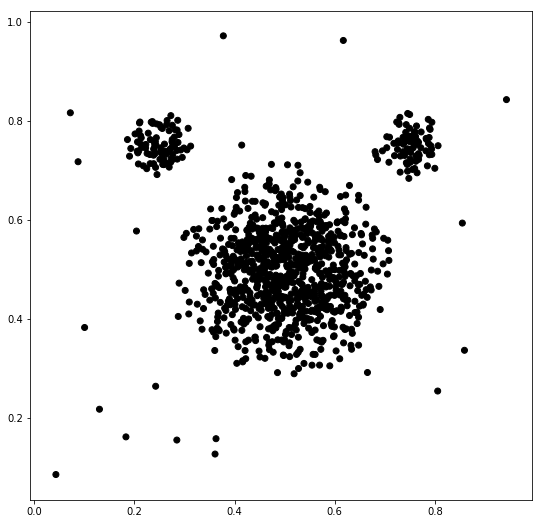

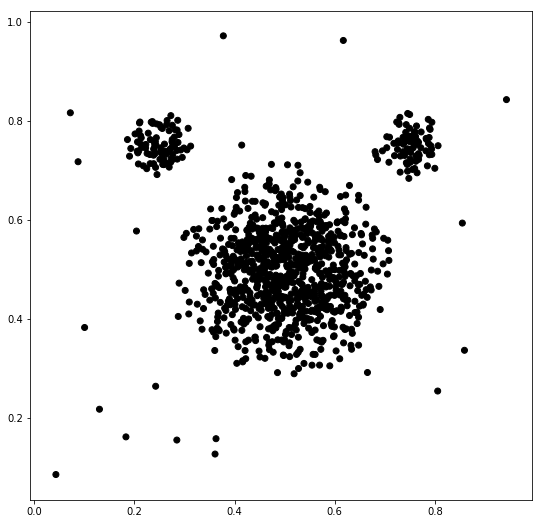

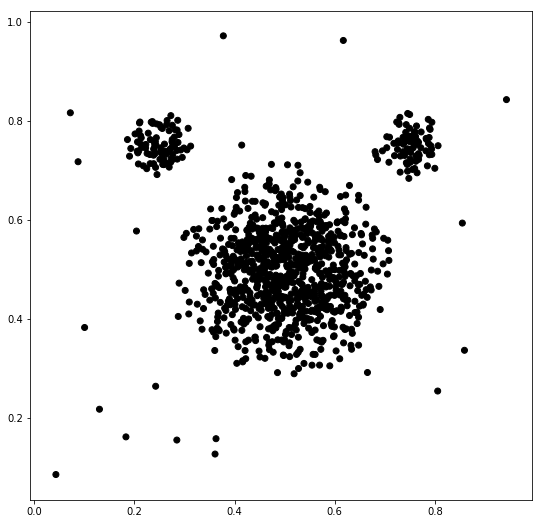

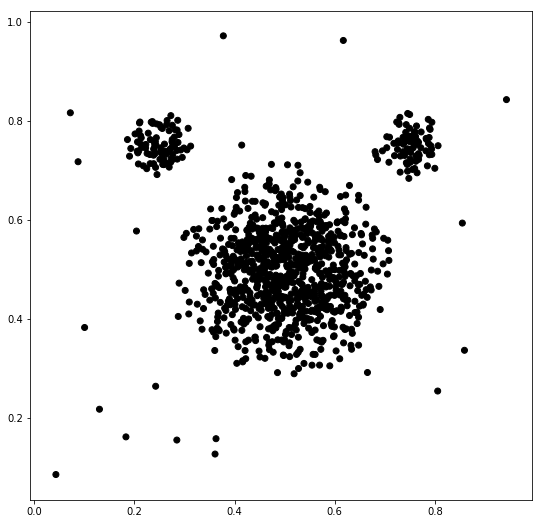

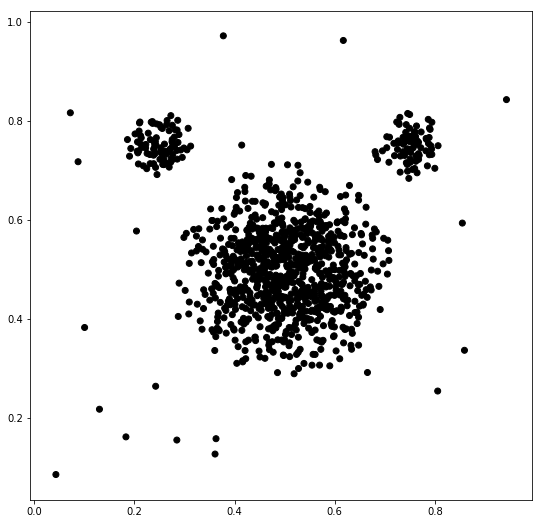

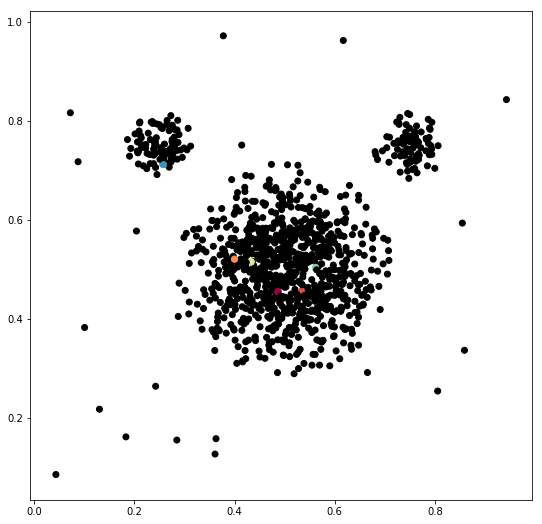

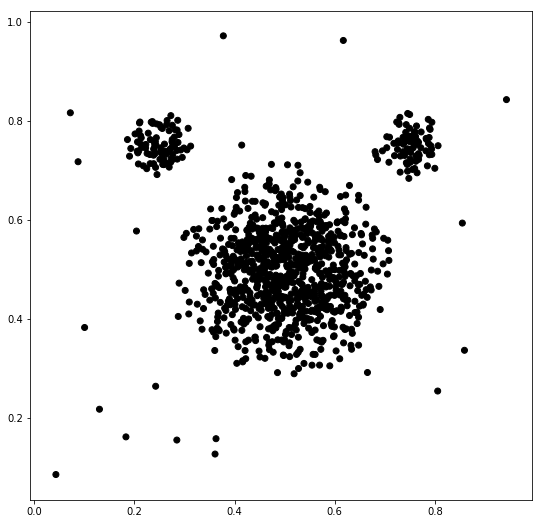

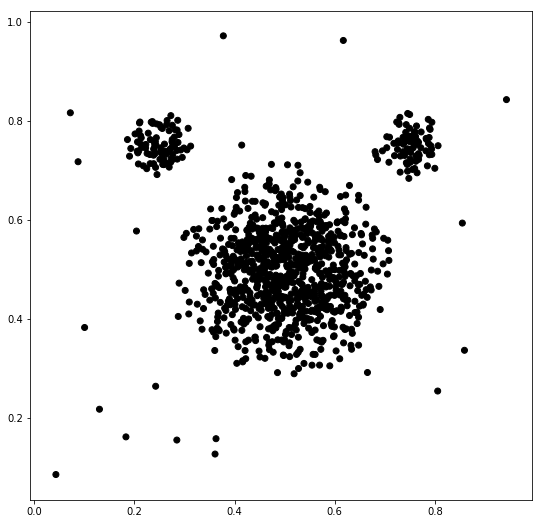

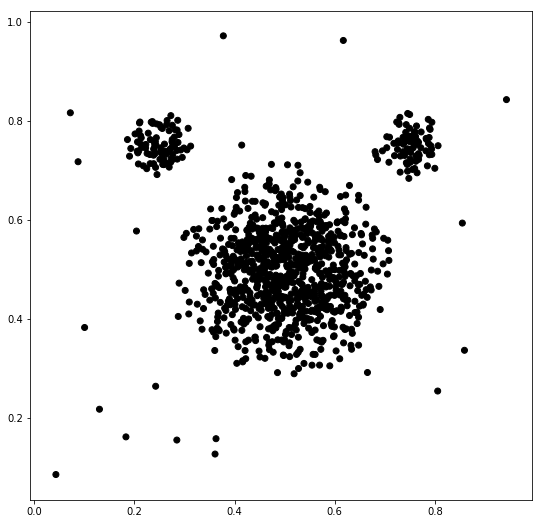

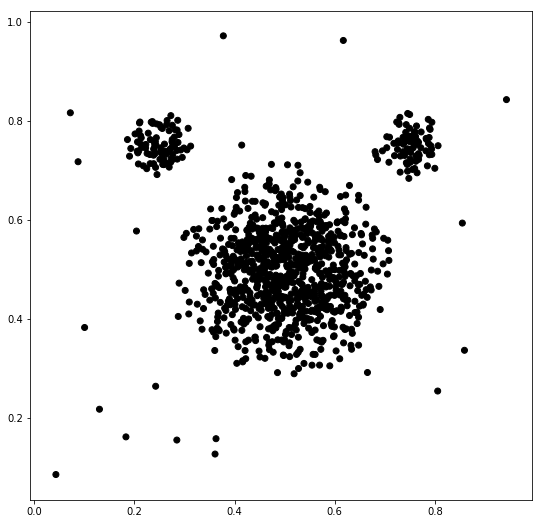

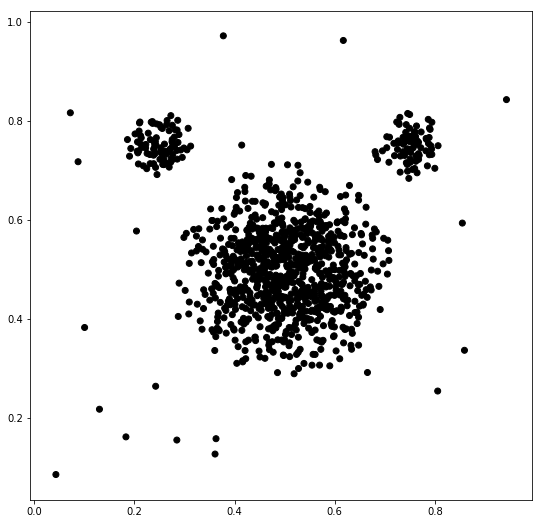

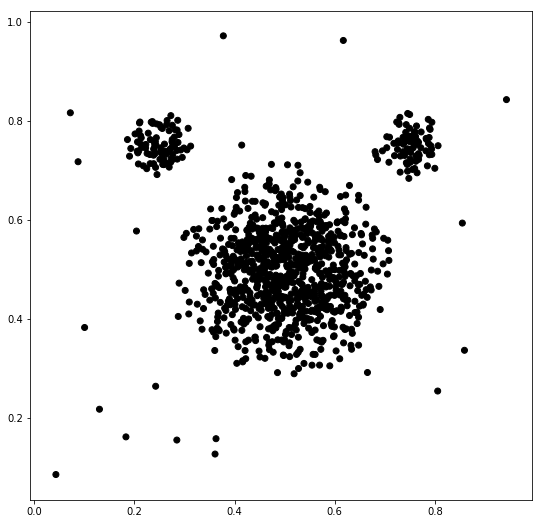

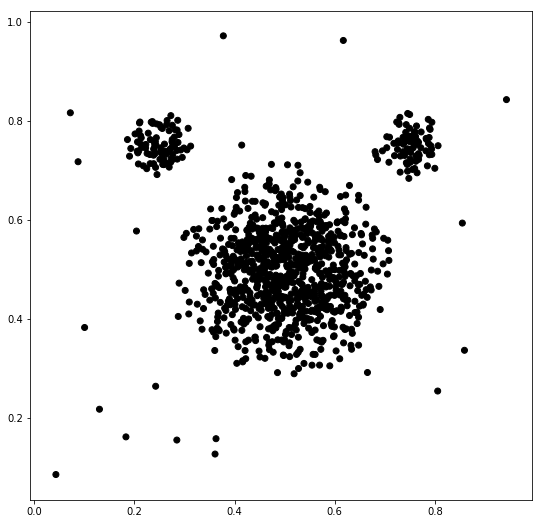

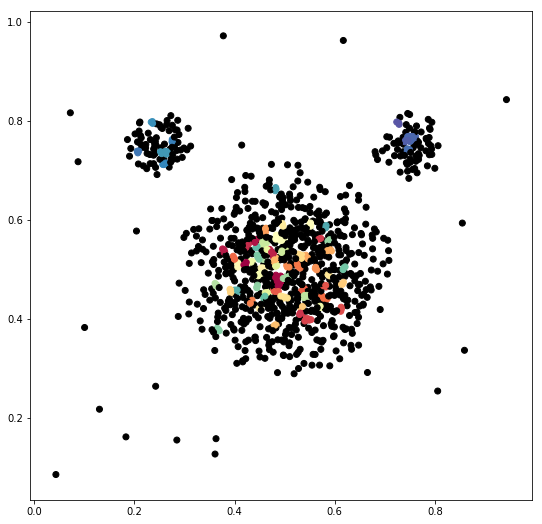

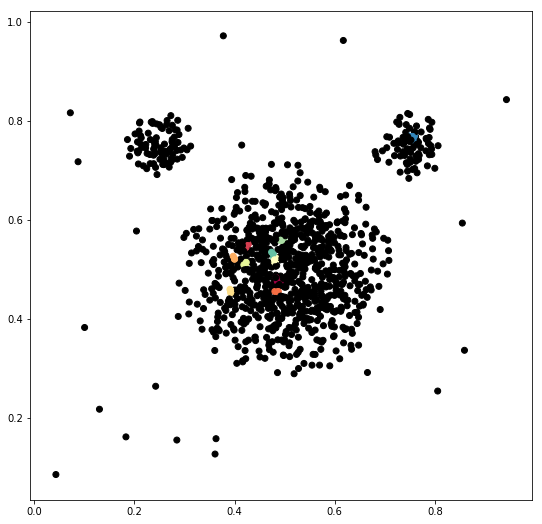

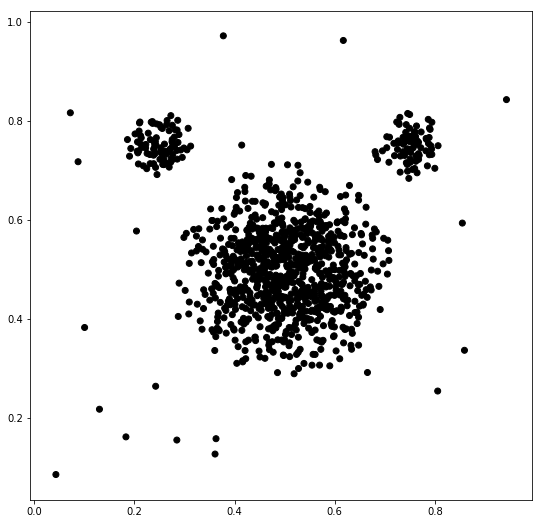

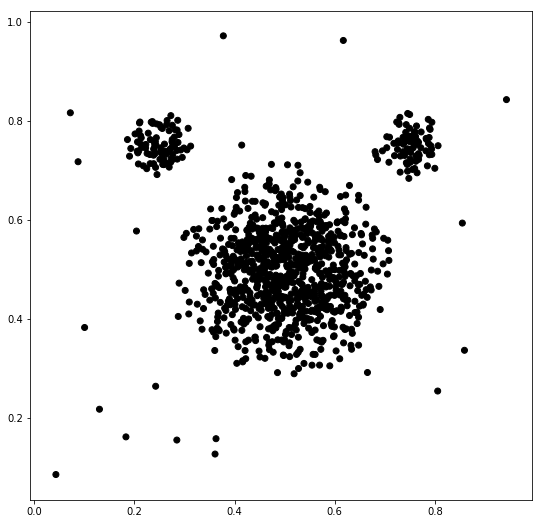

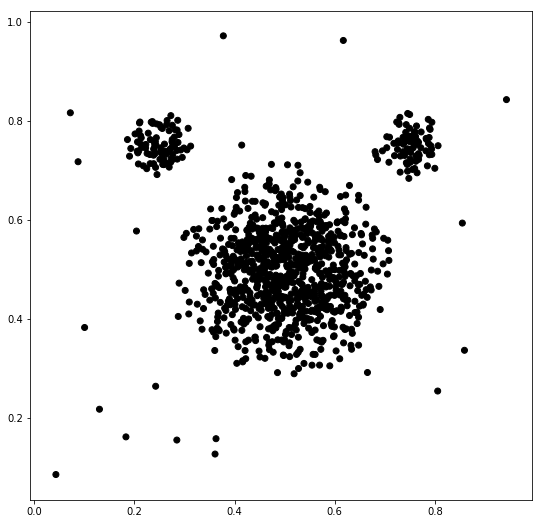

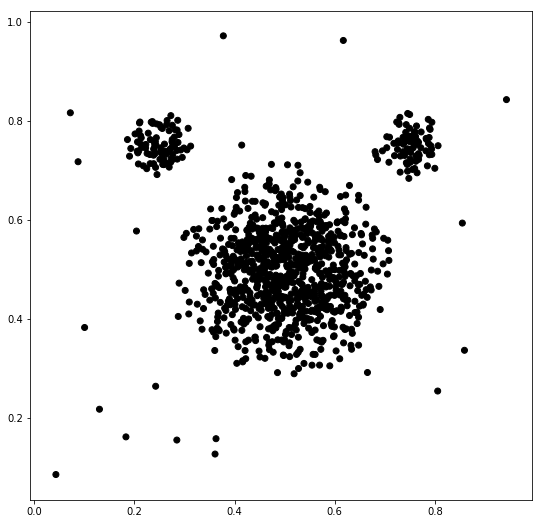

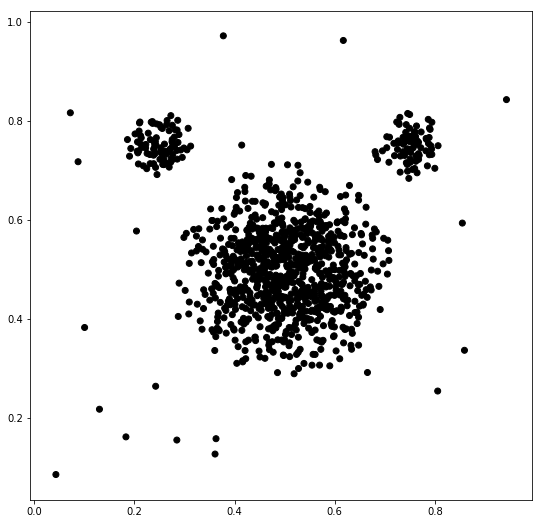

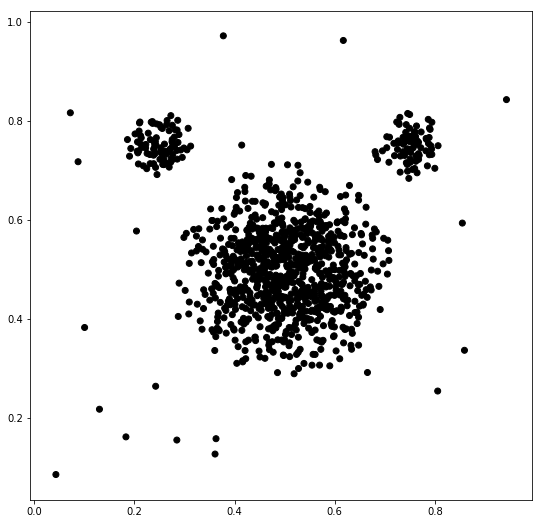

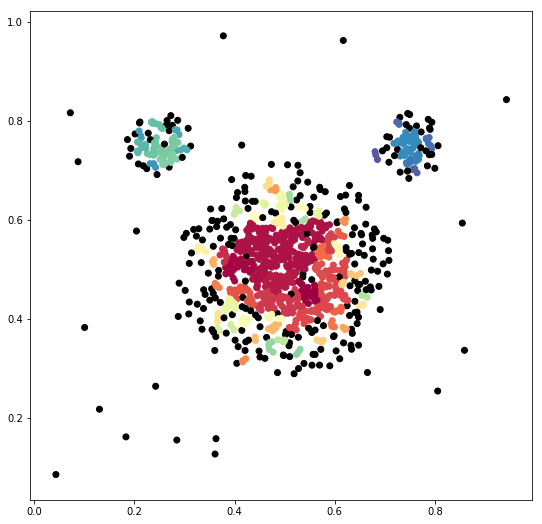

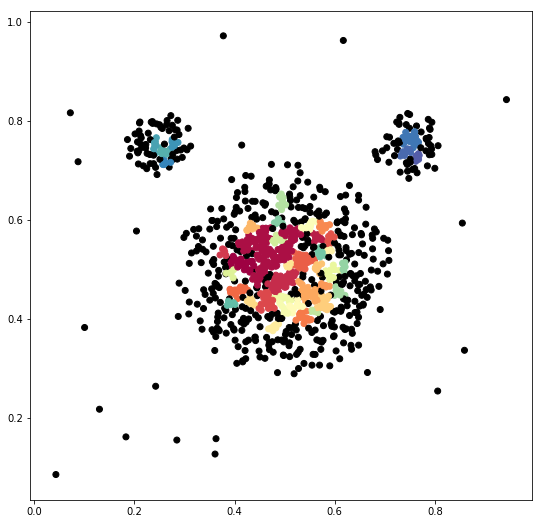

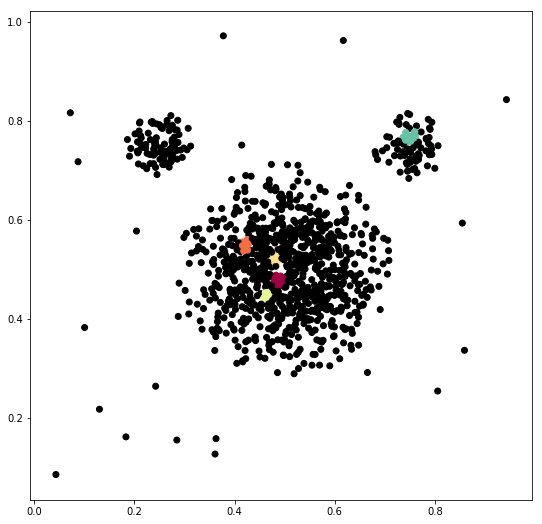

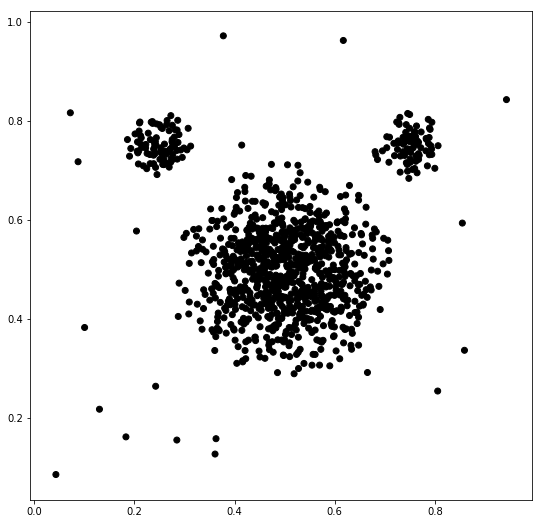

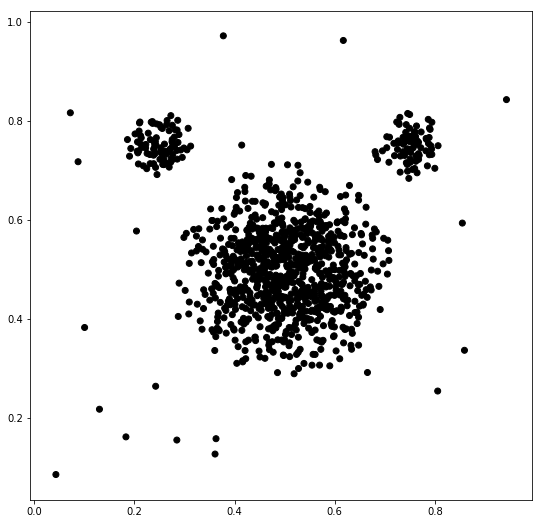

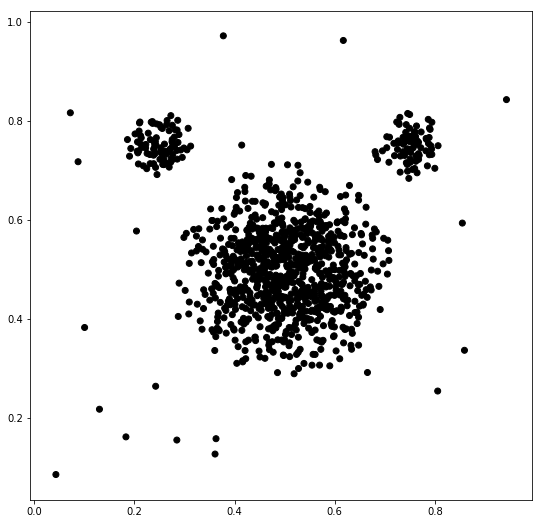

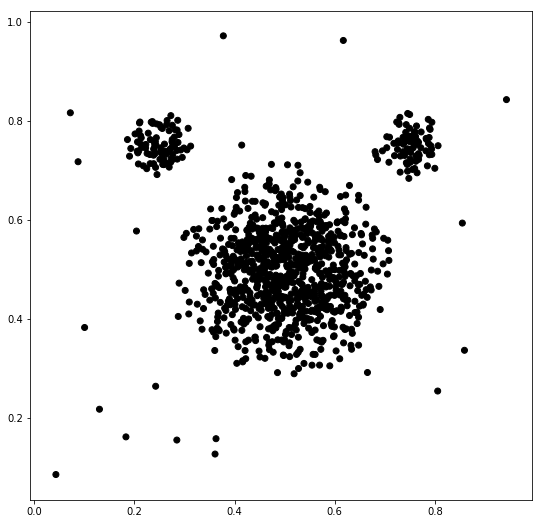

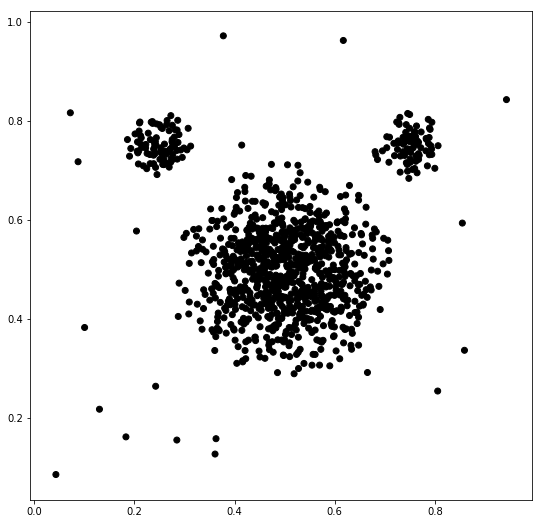

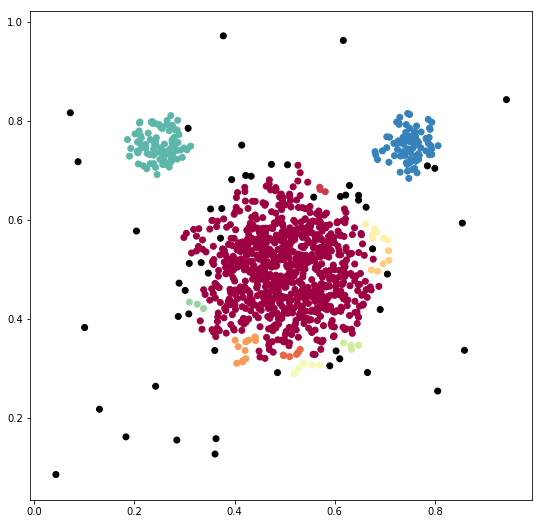

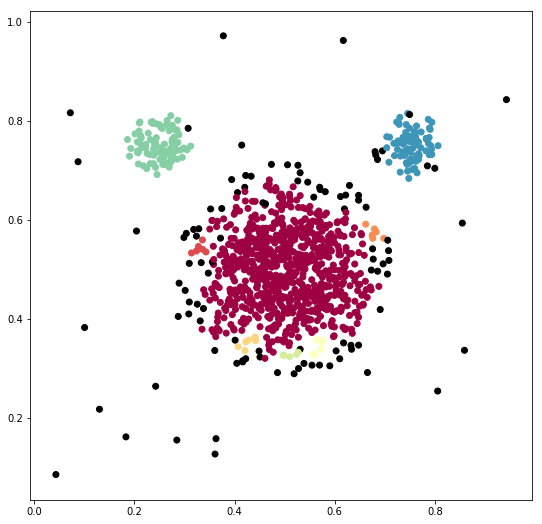

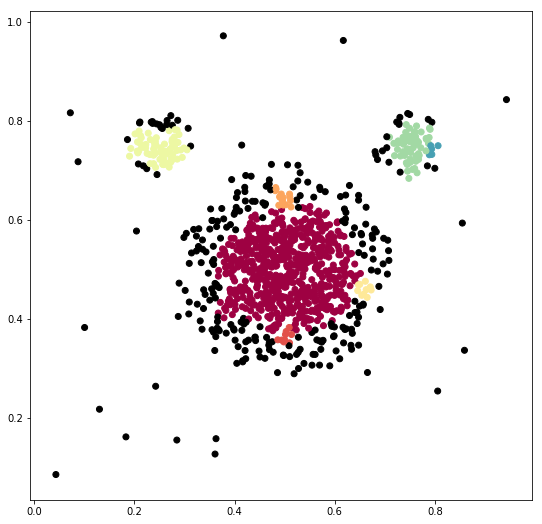

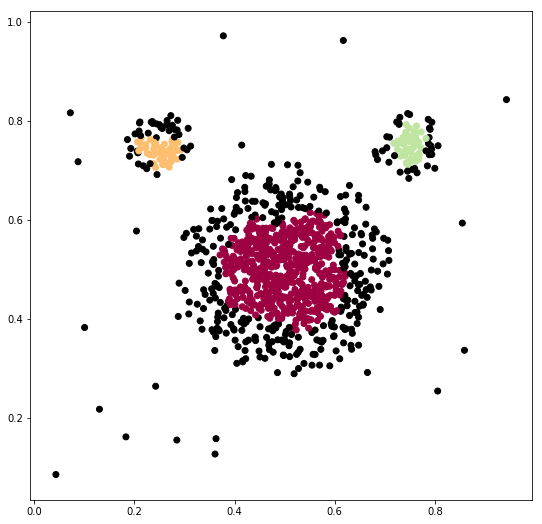

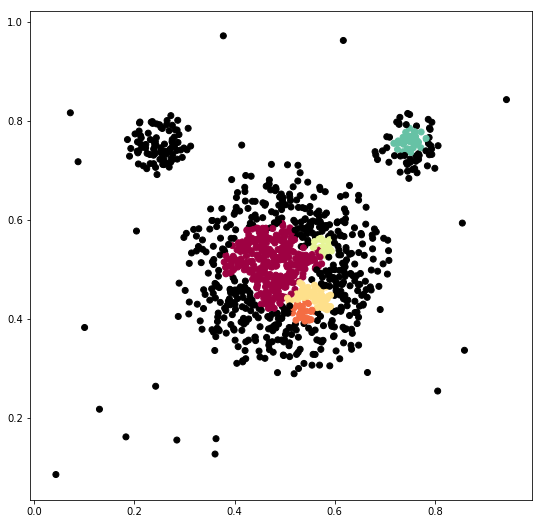

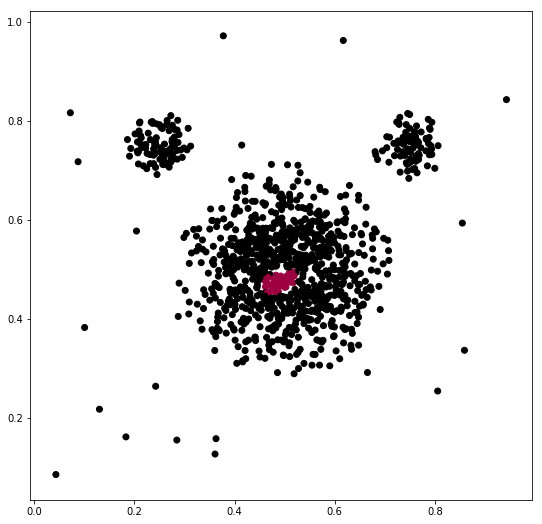

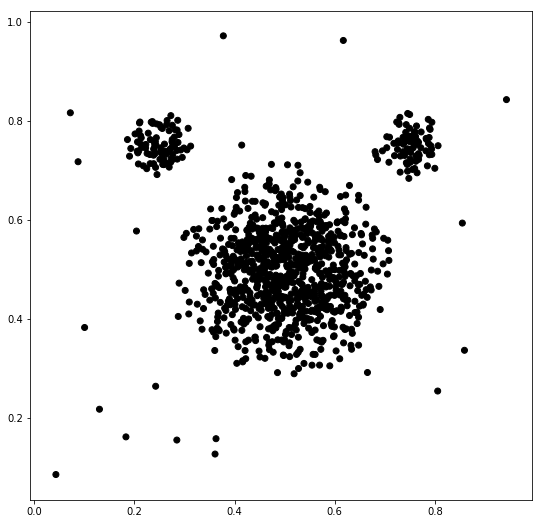

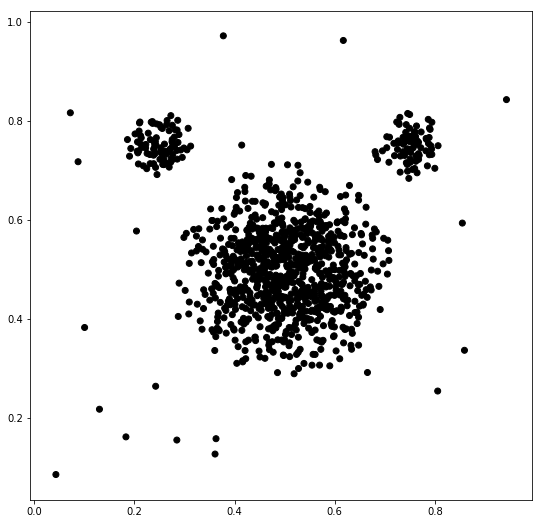

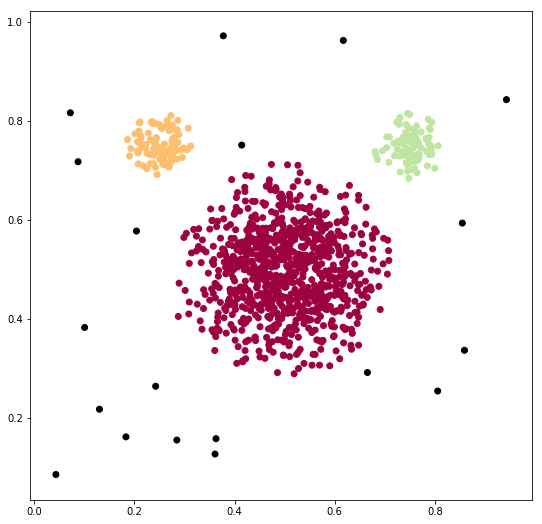

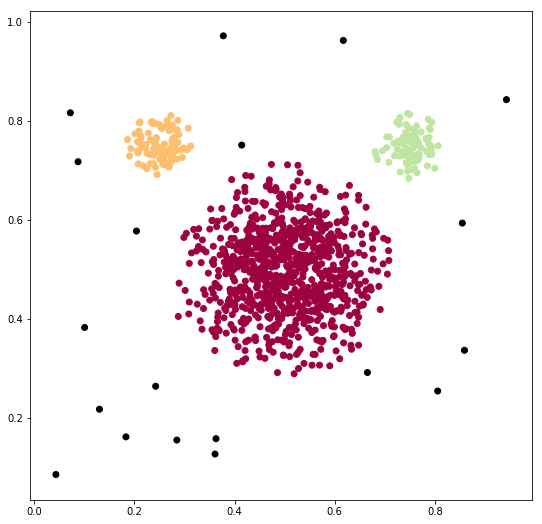

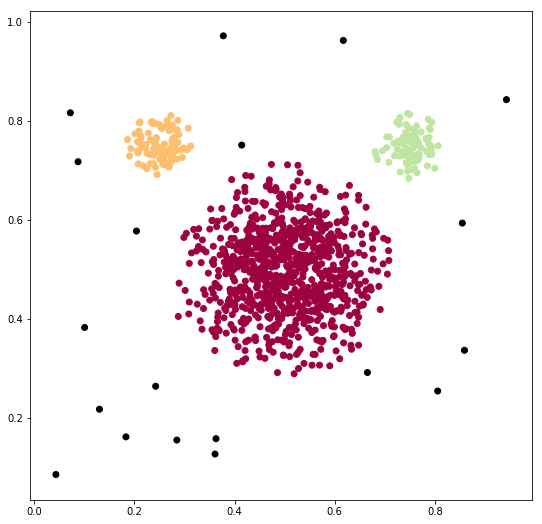

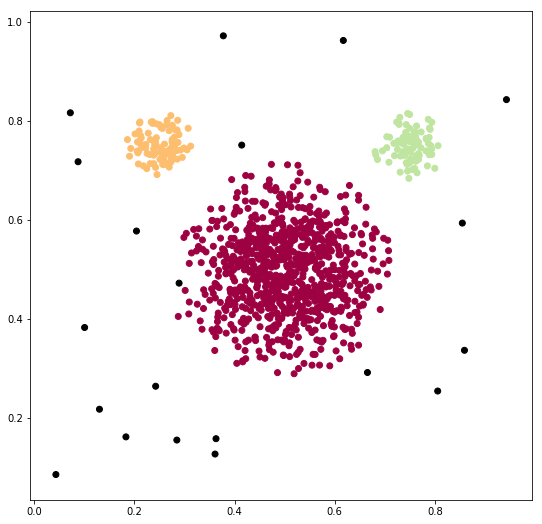

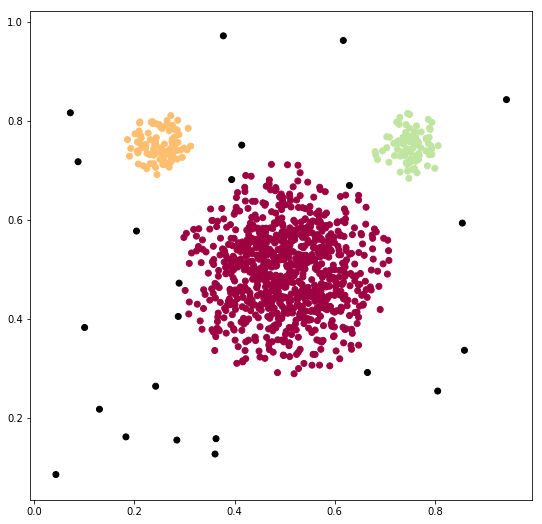

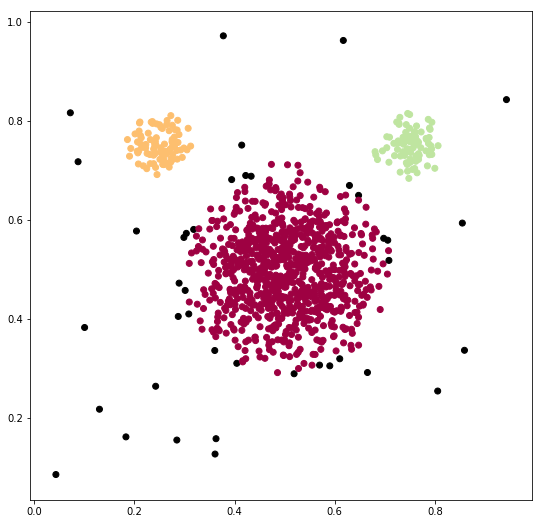

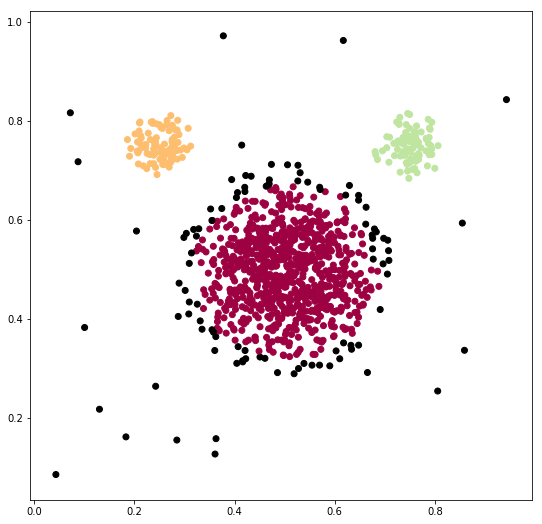

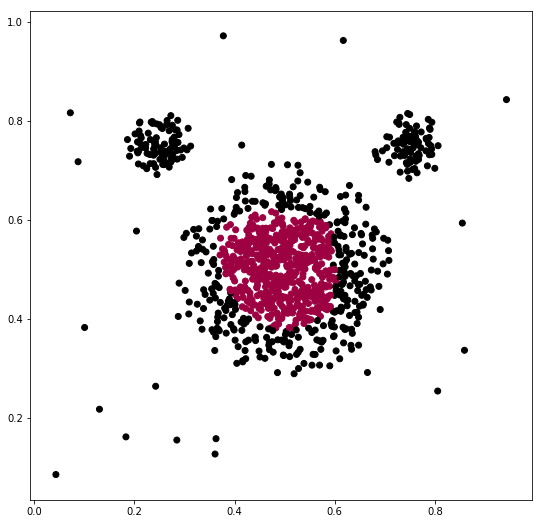

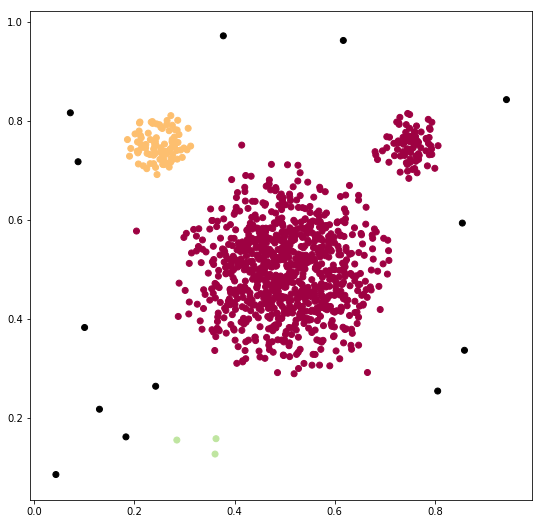

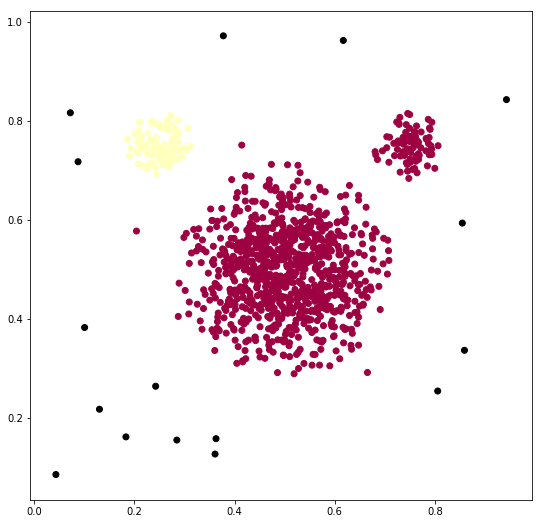

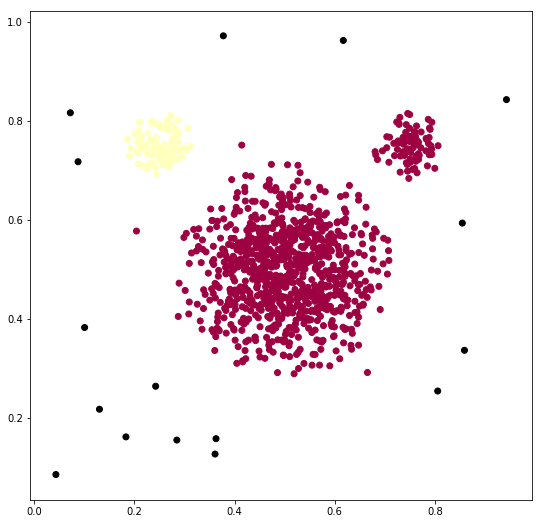

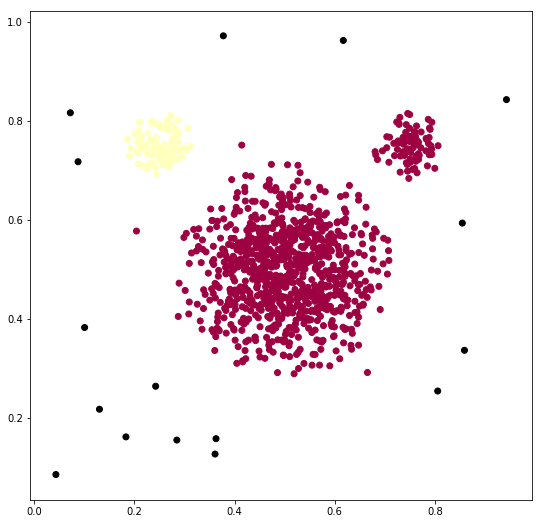

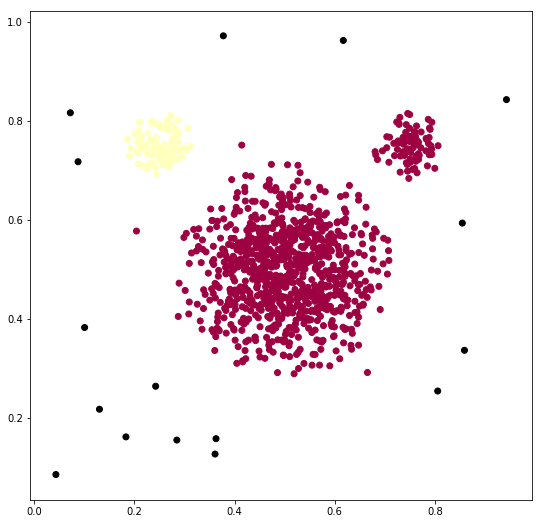

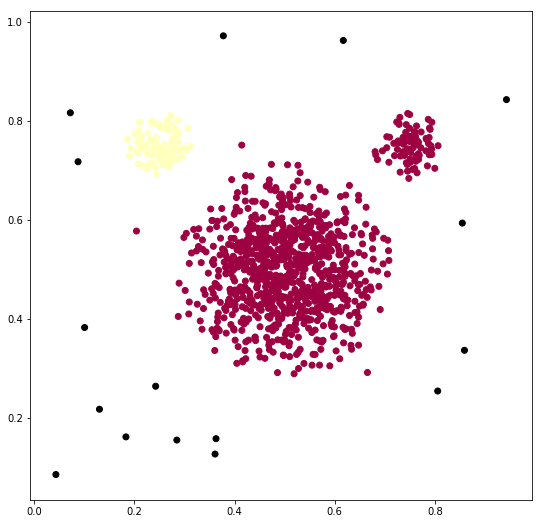

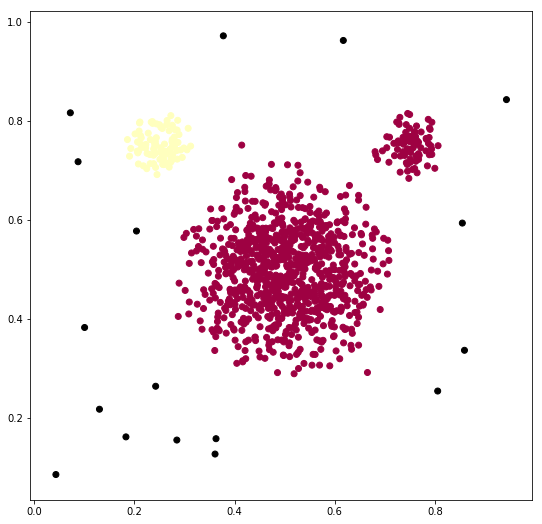

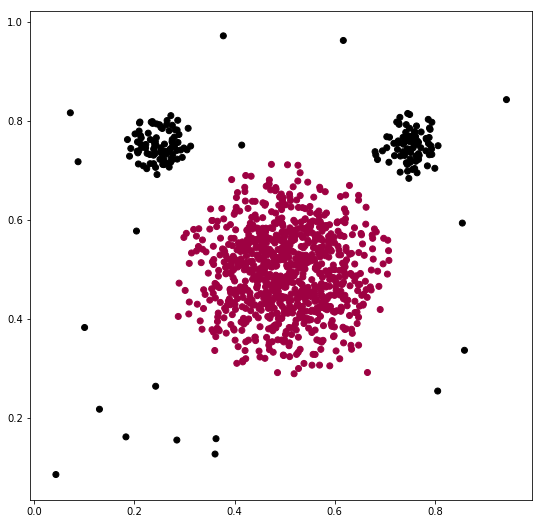

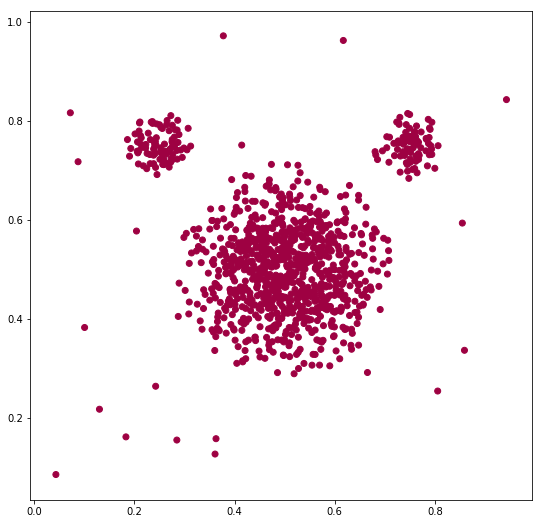

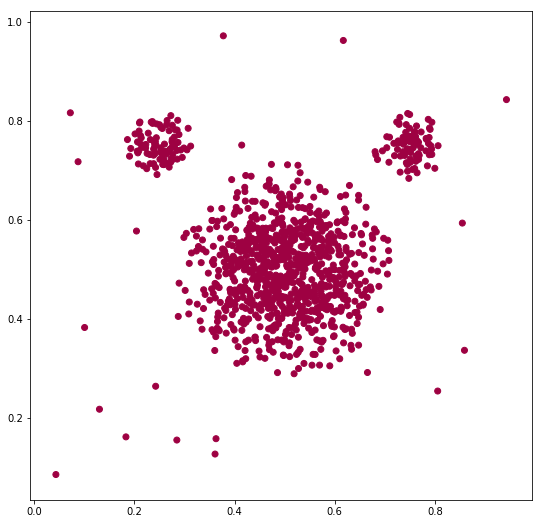

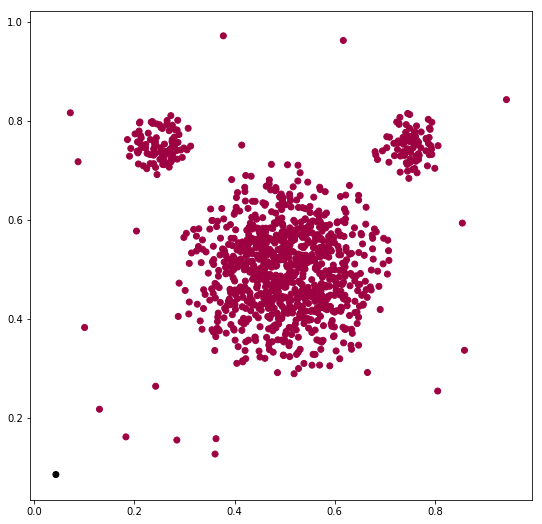

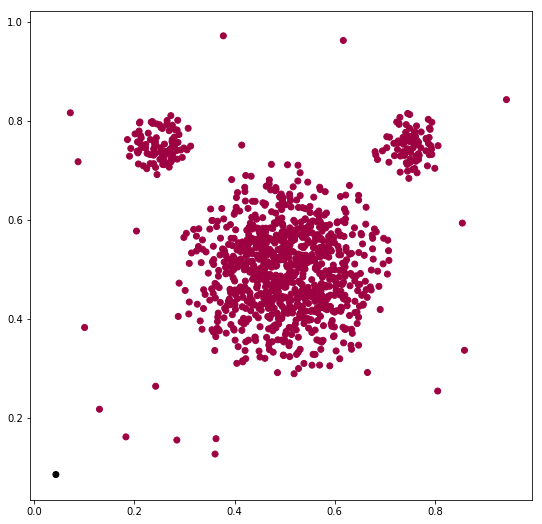

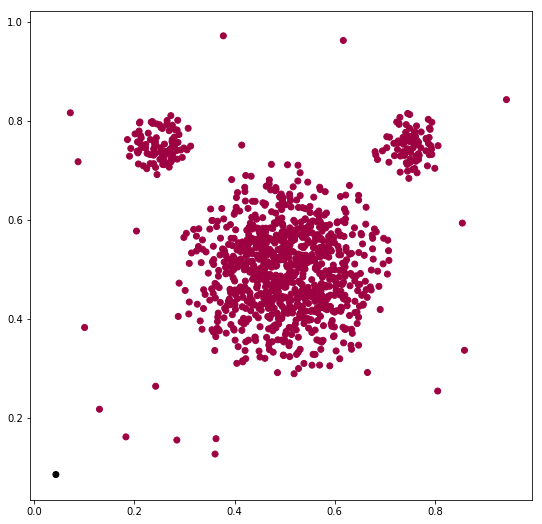

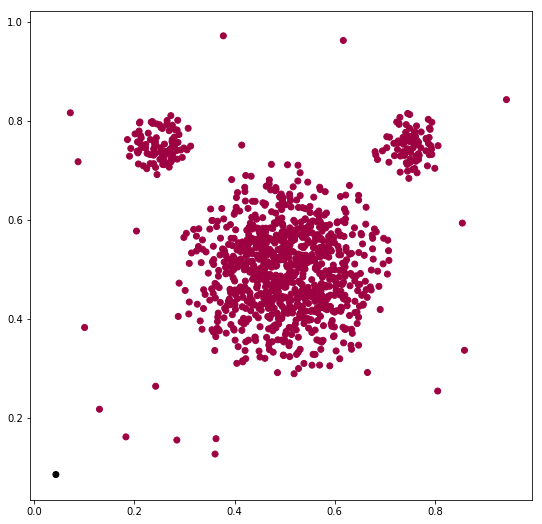

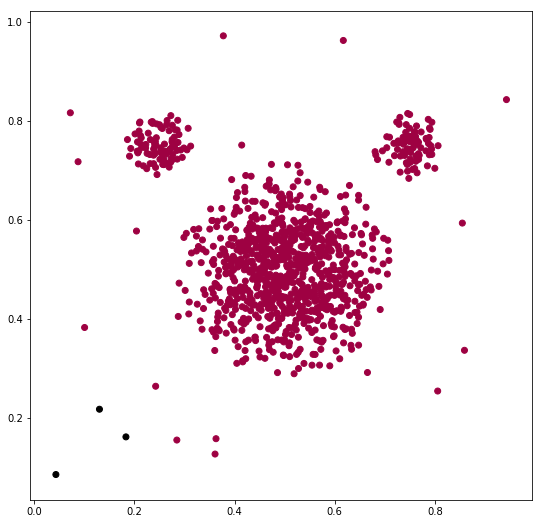

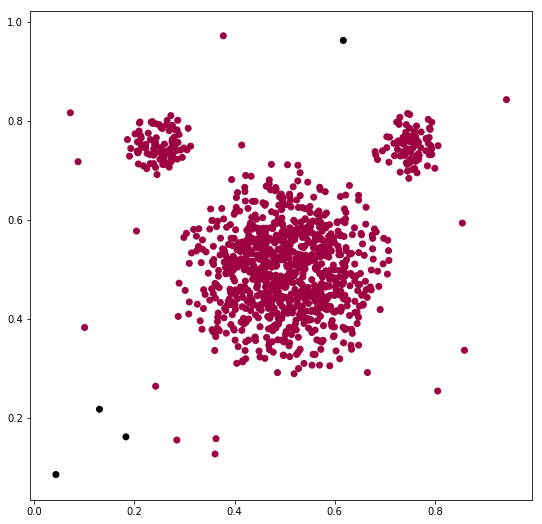

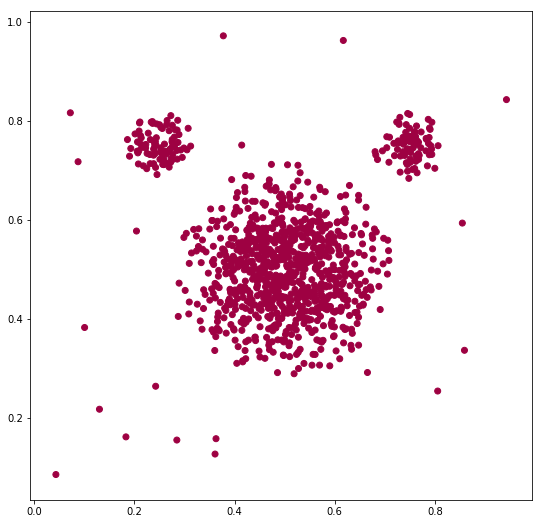

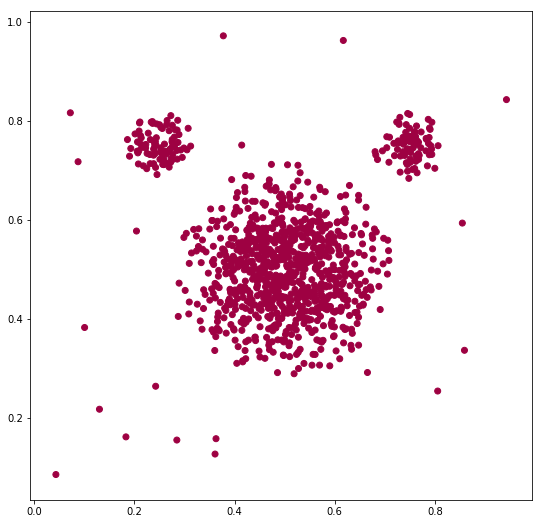

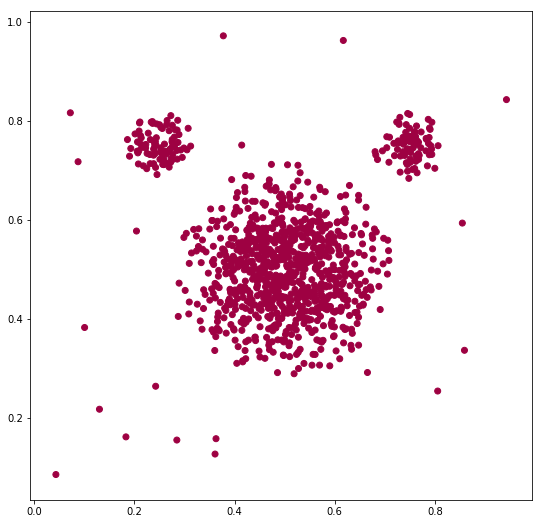

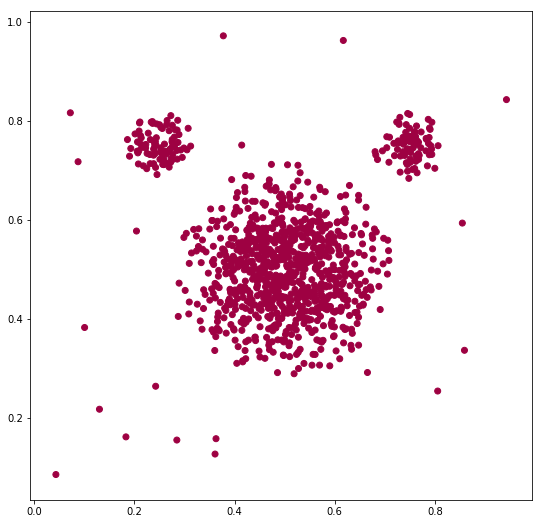

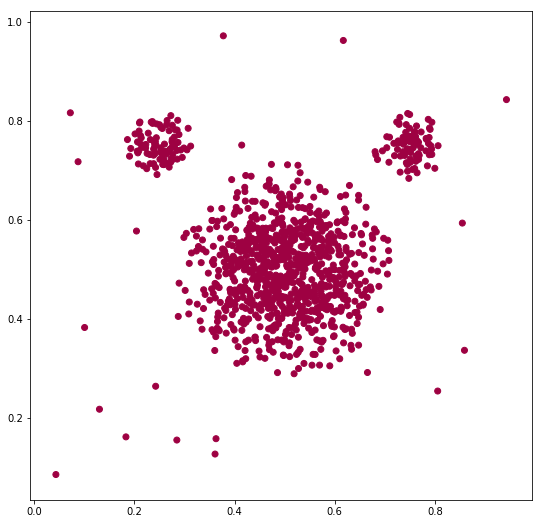

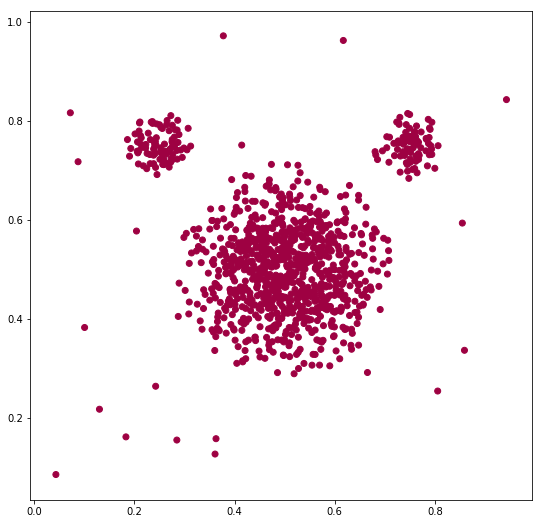

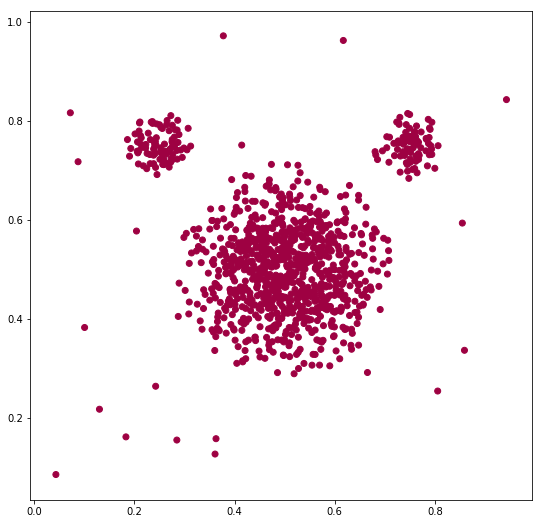

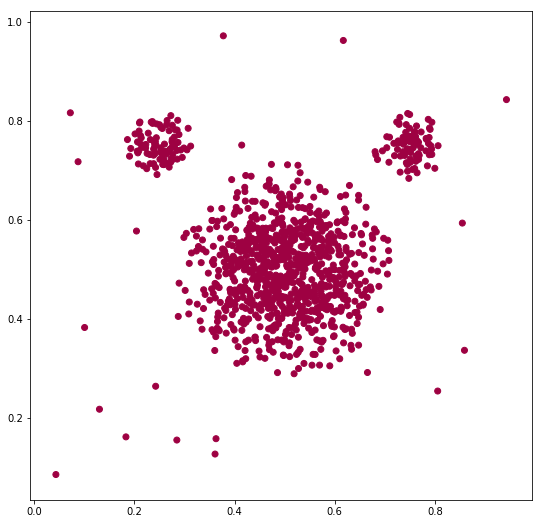

In [108]:
# DBSCAN #

# parameter for DBSAN
eps=[0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
min_samples= [3, 5, 10, 15, 20, 30, 50, 100]


for eps_i in eps : # tuning eps parameter
    for min_j in min_samples : # tuning min_samples parameter
        
        # Create DBSCAN Model by using parameter (eps, min_samples)
        db_model = DBSCAN(eps = eps_i, min_samples = min_j).fit(X)
        
        # result for labels after DBSCAN
        db_labels = db_model.labels_ 
        
        # Create color list by considering the number of labels
        colors = color(db_labels)
    
        # Building the colour vector for each data point 
        # db_cvec = [colours[label] for label in db_labels] 
        db_cvec = [colors[label] for label in db_labels] 
        
        # Plotting P1 on the X-Axis and P2 on the Y-Axis 
        # according to the colour vector defined 
        plt.figure(figsize =(9, 9)) 
        plt.scatter(X[:,0],X[:,1], c = db_cvec)

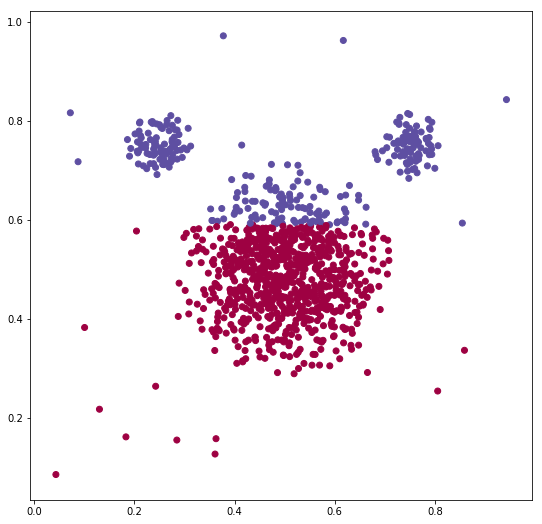

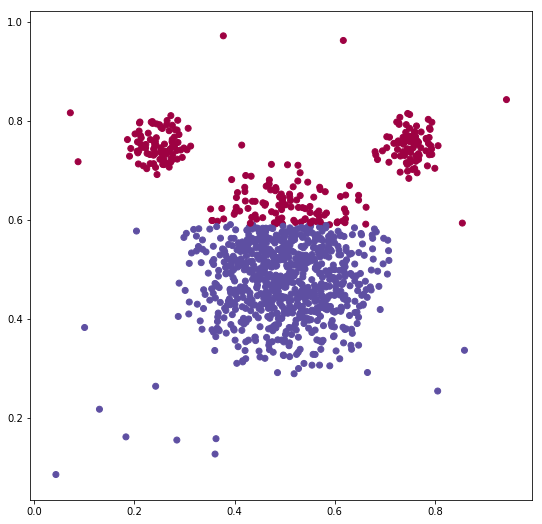

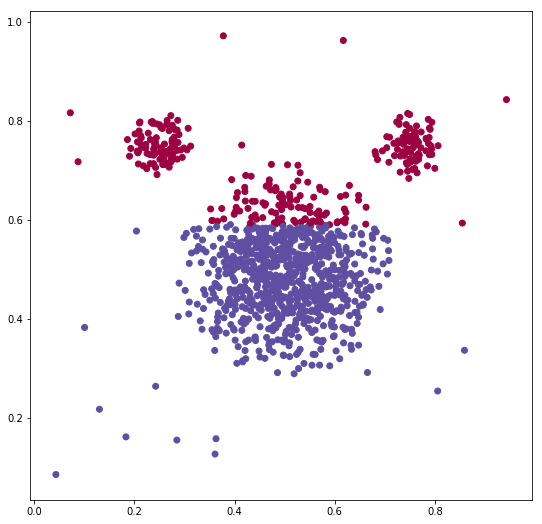

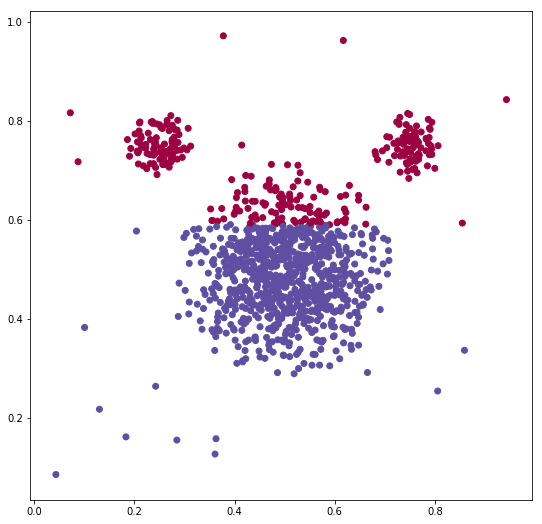

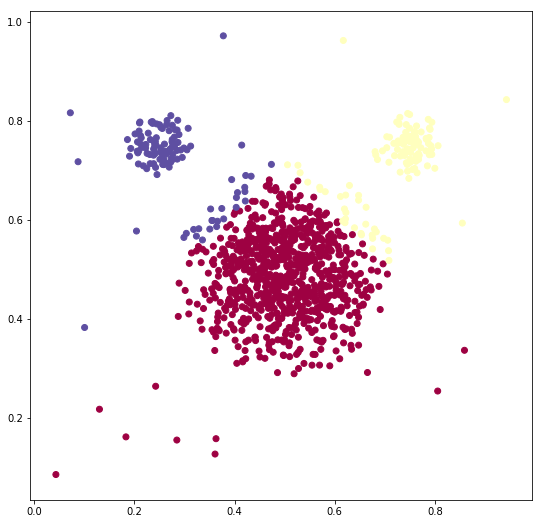

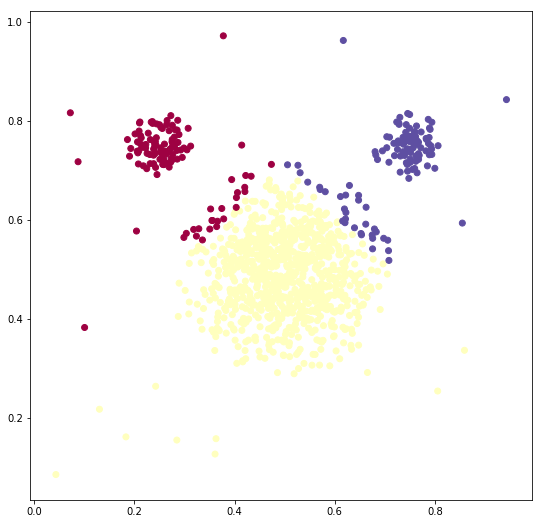

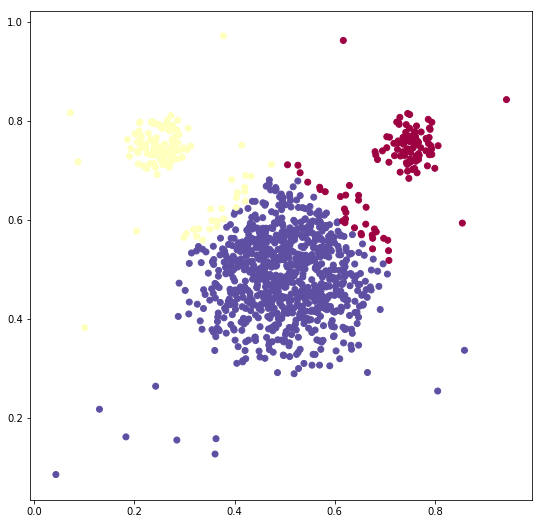

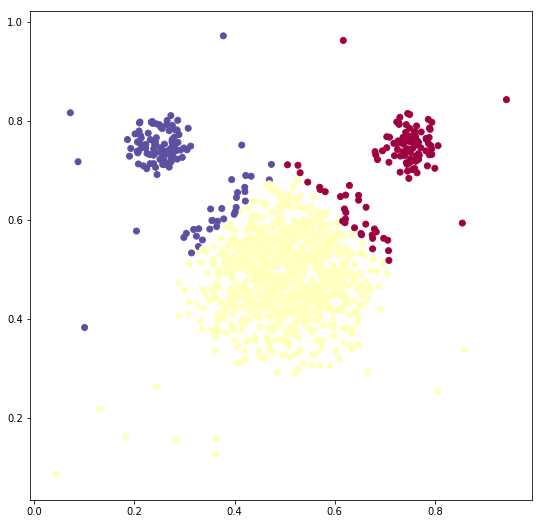

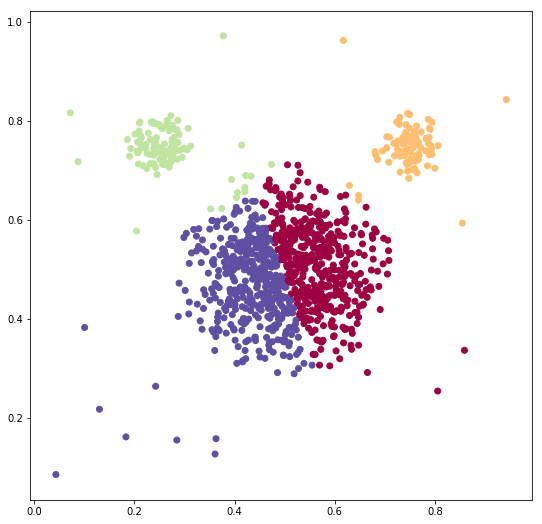

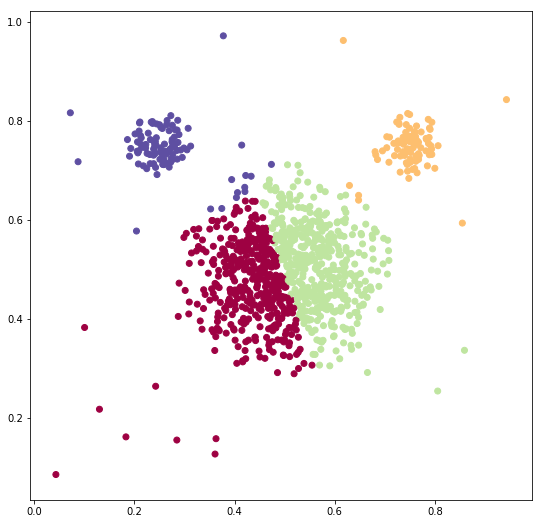

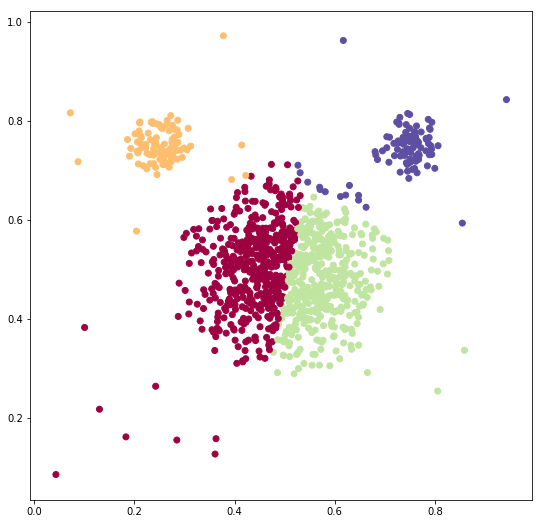

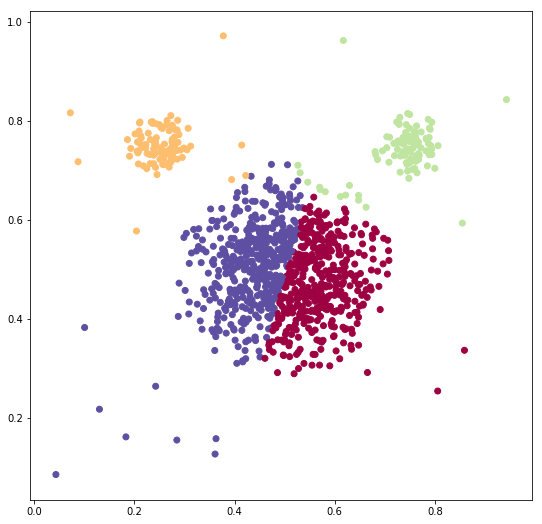

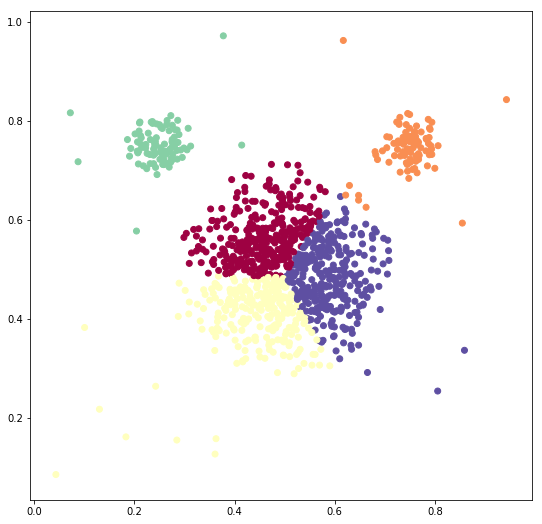

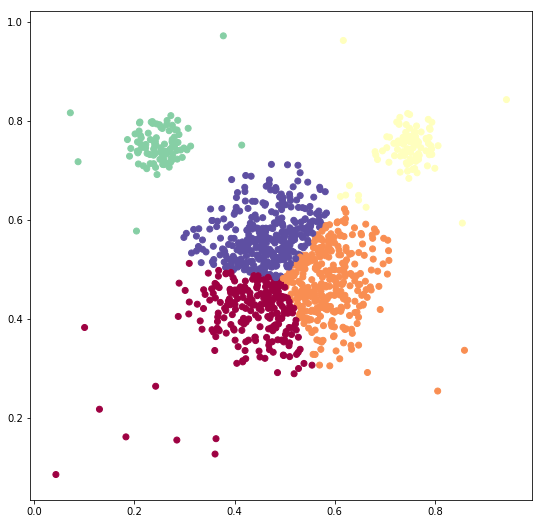

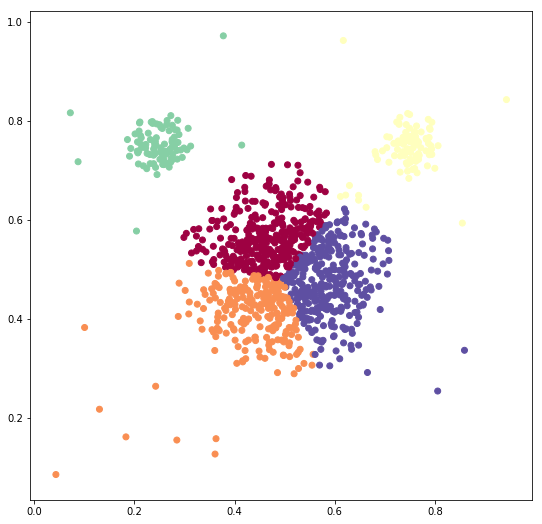

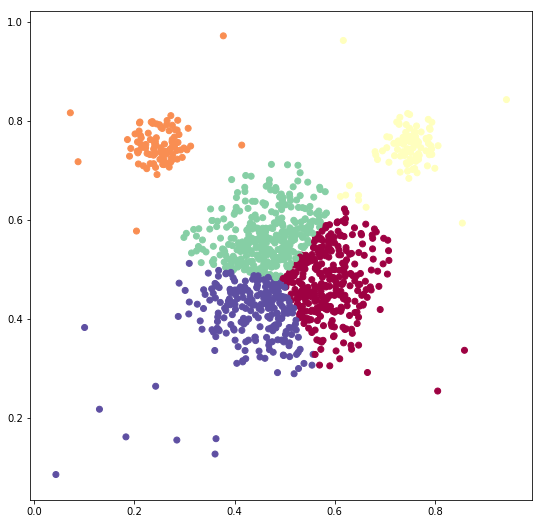

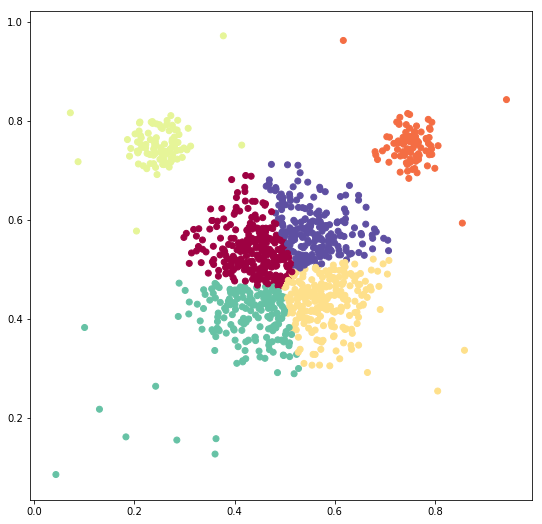

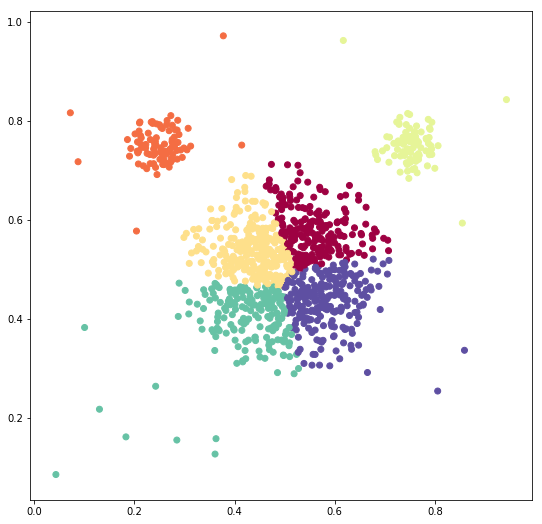

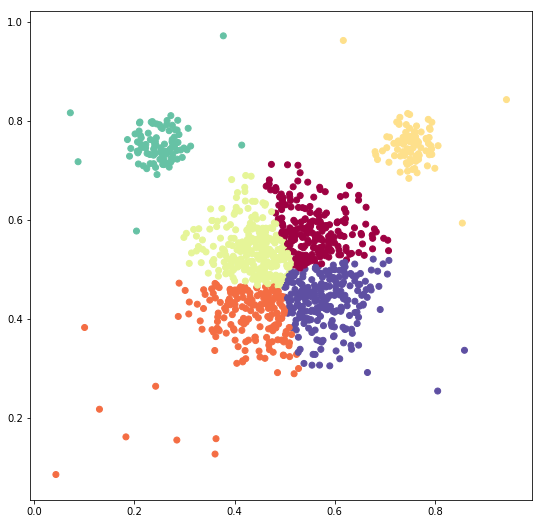

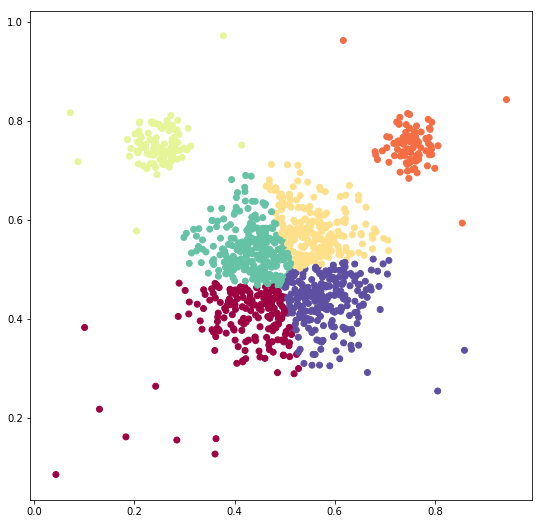

In [109]:
# K-Means #

from sklearn.cluster import KMeans

# parameter for K-Means
n_clusters = [2,3,4,5,6]
max_iter = [50,100,200,300]

for cluster_i in n_clusters : # tuning eps parameter
    for iter_j in max_iter : # tuning min_samples parameter

        # Create KMeans Model by using parameter (n_clusters, min_samples)
        K_model = KMeans(n_clusters=cluster_i, max_iter = iter_j).fit(X)
        K_labels = K_model.labels_
        
        # Create color list by considering the number of labels
        colors = color(K_labels)
        
        # Building the colour vector for each data point 
        K_cvec = [colors[label] for label in K_labels]  
        
        plt.figure(figsize =(9, 9)) 
        plt.scatter(X[:,0],X[:,1], c = K_cvec)      
